In [1]:
import pickle
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from utils import check_in_weights, check_out_weights
import config as cfg

In [16]:
if cfg.type_of_study == 'month':
    file_name = 'all_viajes_month_0322.csv'
elif cfg.type_of_study == 'week':
    file_name = 'viajes_week_0322.csv'  #TODO: CORRECT IF NEEDED
elif cfg.type_of_study == 'two_weeks':
    file_name = 'viajes_two_weeks_0322.csv'  #TODO: CORRECT IF NEEDED
else:
    file_name = 'default_file.csv'  # FIXME: Fallback option if neither is True

# load graph object from file
G = pickle.load(open(f'graphs/{file_name}.pickle', 'rb')) # TAKING THE NETWORK WITH NORMALIZED WEIGHTS , FIXED
income = gpd.read_file('/Users/caro/Desktop/thesis_project/segregation_indices/data/processed/geometries_and_income.geojson')

In [17]:
in_weights = check_in_weights(G)
out_weights = check_out_weights(G)

# Convert dictionaries to DataFrames
in_weights_df = pd.DataFrame(list(in_weights.items()), columns=['District', 'Total In-weight'])
out_weights_df = pd.DataFrame(list(out_weights.items()), columns=['District', 'Total Out-weight'])

Node Centro Total In-weight: 4.08
Node Arganzuela Total In-weight: 2.56
Node Retiro Total In-weight: 2.79
Node Salamanca Total In-weight: 2.61
Node Chamartín Total In-weight: 3.22
Node Tetuán Total In-weight: 2.82
Node Chamberí Total In-weight: 2.83
Node Fuencarral-El Pardo Total In-weight: 2.6
Node Moncloa-Aravaca Total In-weight: 2.28
Node Latina Total In-weight: 1.68
Node Carabanchel Total In-weight: 2.63
Node Usera Total In-weight: 2.46
Node Puente de Vallecas Total In-weight: 3.75
Node Moratalaz Total In-weight: 2.45
Node Ciudad Lineal Total In-weight: 3.02
Node Hortaleza Total In-weight: 2.88
Node Villaverde Total In-weight: 2.2
Node Villa de Vallecas Total In-weight: 2.56
Node Vicálvaro Total In-weight: 2.41
Node San Blas-Canillejas Total In-weight: 2.57
Node Barajas Total In-weight: 2.06
Node Centro Total Out-weight: 2.13
Node Arganzuela Total Out-weight: 2.26
Node Retiro Total Out-weight: 1.96
Node Salamanca Total Out-weight: 2.14
Node Chamartín Total Out-weight: 2.02
Node Tet

In [18]:
in_weights_df['Median income per consumption unit'] = income['Median income per consumption unit'] / 1000
in_weights_df['Gini Index'] = income['Gini Index']

out_weights_df['Median income per consumption unit'] = income['Median income per consumption unit'] / 1000
out_weights_df['Gini Index'] = income['Gini Index']

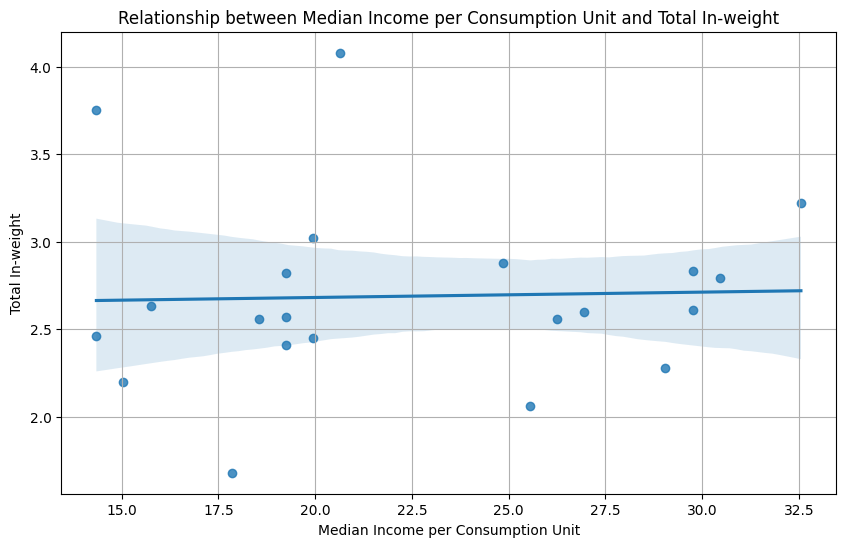

In [19]:
plt.figure(figsize=(10, 6)) # use 32.5 to improve explicability
sns.regplot(x='Median income per consumption unit', y='Total In-weight', data=in_weights_df)
plt.xlabel('Median Income per Consumption Unit')
plt.ylabel('Total In-weight')
plt.title('Relationship between Median Income per Consumption Unit and Total In-weight')
plt.grid(True)
plt.show()

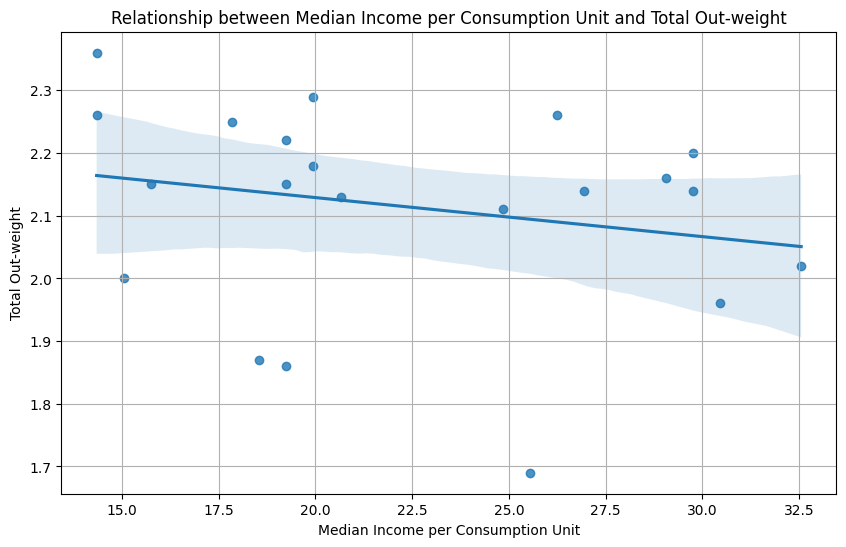

In [20]:
plt.figure(figsize=(10, 6))
sns.regplot(x='Median income per consumption unit', y='Total Out-weight', data=out_weights_df)
plt.xlabel('Median Income per Consumption Unit')
plt.ylabel('Total Out-weight')
plt.title('Relationship between Median Income per Consumption Unit and Total Out-weight')
plt.grid(True)
plt.show()

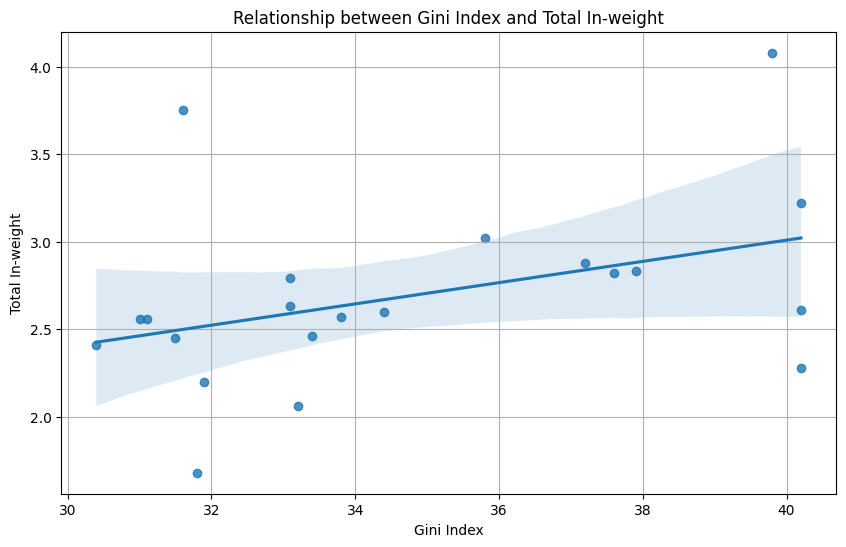

In [21]:
plt.figure(figsize=(10, 6))
sns.regplot(x='Gini Index', y='Total In-weight', data=in_weights_df)
plt.xlabel('Gini Index')
plt.ylabel('Total In-weight')
plt.title('Relationship between Gini Index and Total In-weight')
plt.grid(True)
plt.show()

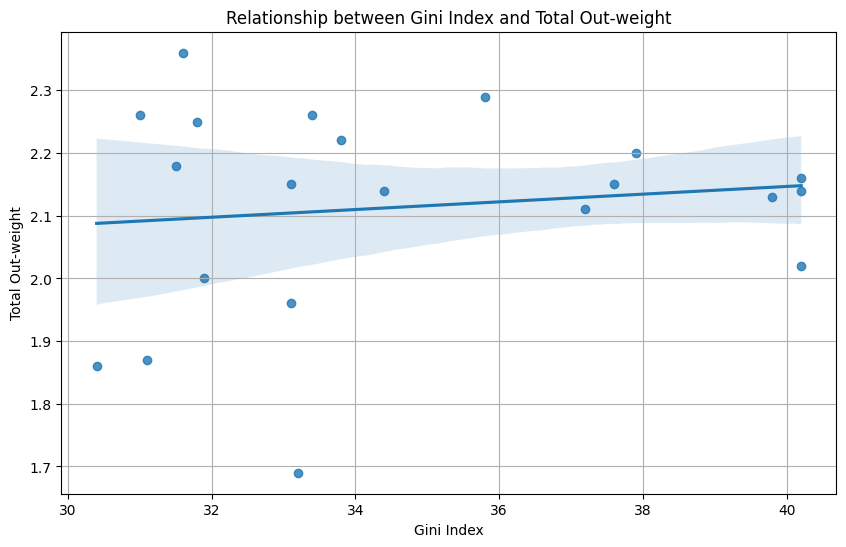

In [22]:
plt.figure(figsize=(10, 6))
sns.regplot(x='Gini Index', y='Total Out-weight', data=out_weights_df)
plt.xlabel('Gini Index')
plt.ylabel('Total Out-weight')
plt.title('Relationship between Gini Index and Total Out-weight')
plt.grid(True)
plt.show()

In [23]:
X = in_weights_df['Median income per consumption unit']
y = in_weights_df['Total In-weight']

# Add a constant (intercept) to the model
X = sm.add_constant(X)

# Step 3: Fit the regression model
model = sm.OLS(y, X).fit()

# Step 4: Display the regression results
print(model.summary())

with open(f'regressions/{cfg.type_of_study}_in_weight_median.html', 'w') as file:
    file.write(model.summary().as_html())

                            OLS Regression Results                            
Dep. Variable:        Total In-weight   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.051
Method:                 Least Squares   F-statistic:                   0.02161
Date:                Sun, 08 Dec 2024   Prob (F-statistic):              0.885
Time:                        22:06:00   Log-Likelihood:                -15.923
No. Observations:                  21   AIC:                             35.85
Df Residuals:                      19   BIC:                             37.94
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

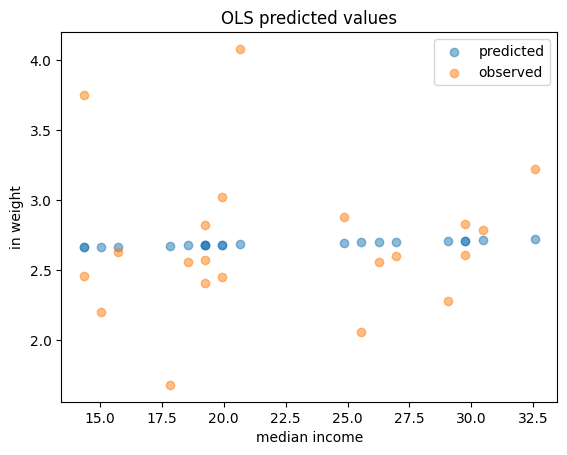

In [24]:
fix, ax = plt.subplots()
ax.scatter(in_weights_df['Median income per consumption unit'], model.predict(), alpha=0.5,
        label='predicted')

# Plot observed values

ax.scatter(in_weights_df['Median income per consumption unit'], in_weights_df['Total In-weight'], alpha=0.5,
        label='observed')

ax.legend()
ax.set_title('OLS predicted values')
ax.set_xlabel('median income')
ax.set_ylabel('in weight')
plt.show()

In [25]:
X = out_weights_df['Median income per consumption unit']
y = out_weights_df['Total Out-weight']

# Add a constant (intercept) to the model
X = sm.add_constant(X)

# Step 3: Fit the regression model
model = sm.OLS(y, X).fit()

# Step 4: Display the regression results
print(model.summary())

with open(f'regressions/{cfg.type_of_study}_out_weight_median.html', 'w') as file:
    file.write(model.summary().as_html())

                            OLS Regression Results                            
Dep. Variable:       Total Out-weight   R-squared:                       0.050
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.9924
Date:                Sun, 08 Dec 2024   Prob (F-statistic):              0.332
Time:                        22:06:01   Log-Likelihood:                 9.3446
No. Observations:                  21   AIC:                            -14.69
Df Residuals:                      19   BIC:                            -12.60
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

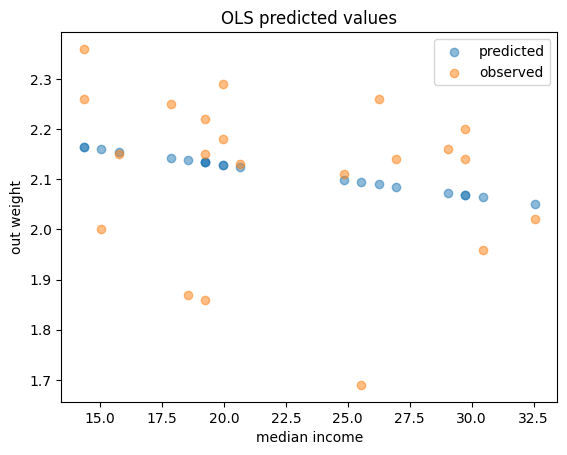

In [26]:
fix, ax = plt.subplots()
ax.scatter(out_weights_df['Median income per consumption unit'], model.predict(), alpha=0.5,
        label='predicted')

# Plot observed values

ax.scatter(out_weights_df['Median income per consumption unit'], out_weights_df['Total Out-weight'], alpha=0.5,
        label='observed')

ax.legend()
ax.set_title('OLS predicted values')
ax.set_xlabel('median income')
ax.set_ylabel('out weight')
plt.show()

In [27]:
X = in_weights_df['Gini Index']
y = in_weights_df['Total In-weight']

# Add a constant (intercept) to the model
X = sm.add_constant(X)

# Step 3: Fit the regression model
model = sm.OLS(y, X).fit()

# Step 4: Display the regression results
print(model.summary())

with open(f'regressions/{cfg.type_of_study}_in_weight_gini.html', 'w') as file:
    file.write(model.summary().as_html())

                            OLS Regression Results                            
Dep. Variable:        Total In-weight   R-squared:                       0.154
Model:                            OLS   Adj. R-squared:                  0.110
Method:                 Least Squares   F-statistic:                     3.462
Date:                Sun, 08 Dec 2024   Prob (F-statistic):             0.0784
Time:                        22:06:01   Log-Likelihood:                -14.178
No. Observations:                  21   AIC:                             32.36
Df Residuals:                      19   BIC:                             34.44
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5784      1.139      0.508      0.6

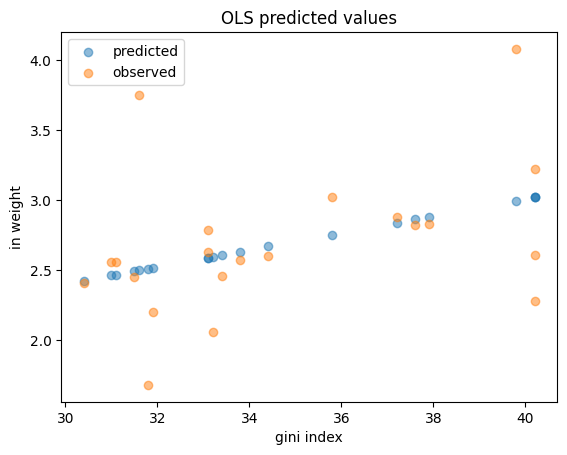

In [28]:
fix, ax = plt.subplots()
ax.scatter(in_weights_df['Gini Index'], model.predict(), alpha=0.5,
        label='predicted')

# Plot observed values

ax.scatter(in_weights_df['Gini Index'], in_weights_df['Total In-weight'], alpha=0.5,
        label='observed')

ax.legend()
ax.set_title('OLS predicted values')
ax.set_xlabel('gini index')
ax.set_ylabel('in weight')
plt.show()

In [29]:
X = out_weights_df['Gini Index']
y = out_weights_df['Total Out-weight']

# Add a constant (intercept) to the model
X = sm.add_constant(X)

# Step 3: Fit the regression model
model = sm.OLS(y, X).fit()

# Step 4: Display the regression results
print(model.summary())

with open(f'regressions/{cfg.type_of_study}_out_weight_gini.html', 'w') as file:
    file.write(model.summary().as_html())

                            OLS Regression Results                            
Dep. Variable:       Total Out-weight   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                 -0.035
Method:                 Least Squares   F-statistic:                    0.3208
Date:                Sun, 08 Dec 2024   Prob (F-statistic):              0.578
Time:                        22:06:02   Log-Likelihood:                 8.9858
No. Observations:                  21   AIC:                            -13.97
Df Residuals:                      19   BIC:                            -11.88
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9011      0.378      5.028      0.0

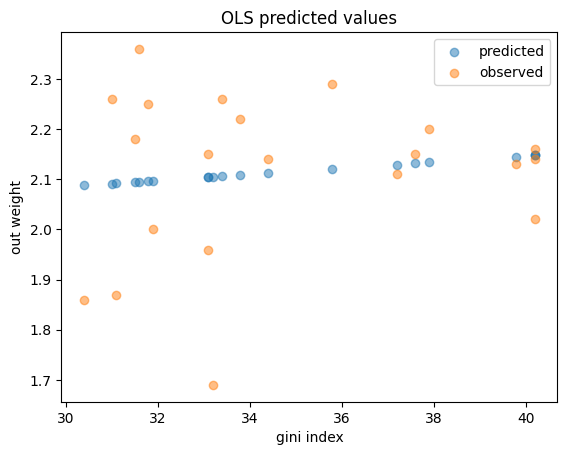

In [30]:
fix, ax = plt.subplots()
ax.scatter(out_weights_df['Gini Index'], model.predict(), alpha=0.5,
        label='predicted')

# Plot observed values

ax.scatter(out_weights_df['Gini Index'], out_weights_df['Total Out-weight'], alpha=0.5,
        label='observed')

ax.legend()
ax.set_title('OLS predicted values')
ax.set_xlabel('gini index')
ax.set_ylabel('out weight')
plt.show()

In [31]:
in_weights_df.to_csv(f'weights/{cfg.type_of_study}_in_weights.csv', index=False)
out_weights_df.to_csv(f'weights/{cfg.type_of_study}_out_weights.csv', index=False)

In [32]:
out_weights_df

,District,Total Out-weight,Median income per consumption unit,Gini Index
0,Centro,2.13,20.65,39.8
1,Arganzuela,2.26,26.25,31.0
2,Retiro,1.96,30.45,33.1
3,Salamanca,2.14,29.75,40.2
4,Chamartín,2.02,32.55,40.2
5,Tetuán,2.15,19.25,37.6
6,Chamberí,2.20,29.75,37.9
7,Fuencarral-El Pardo,2.14,26.95,34.4
8,Moncloa-Aravaca,2.16,29.05,40.2
9,Latina,2.25,17.85,31.8
